In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img1 = cv2.imread('DATA/dog1.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('DATA/copi.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [4]:
img2 = cv2.resize(img2,(200,200))

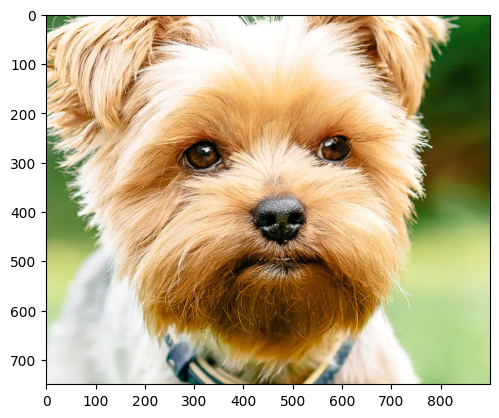

In [5]:
plt.imshow(img1)

In [6]:
img1.shape

(750, 900, 3)

In [14]:
x_offset = 900-200
y_offset =750-200

In [15]:
img2.shape

(200, 200, 3)

In [16]:
rows,cols,channels = img2.shape

In [10]:
rows

200

In [17]:
cols

200

In [18]:
roi = img1[y_offset:750, x_offset:900]

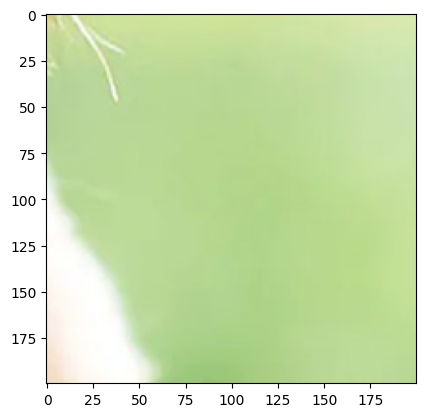

In [19]:
plt.imshow(roi)

In [20]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

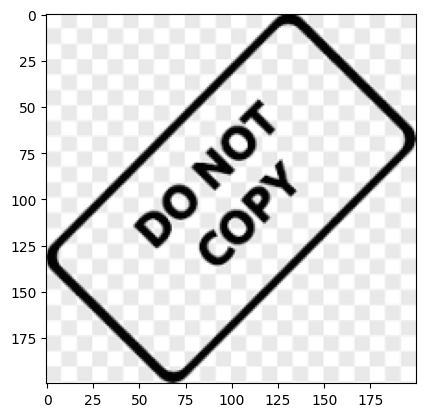

In [22]:
plt.imshow(img2gray, cmap='gray')

In [23]:
mask_inv = cv2.bitwise_not(img2gray)

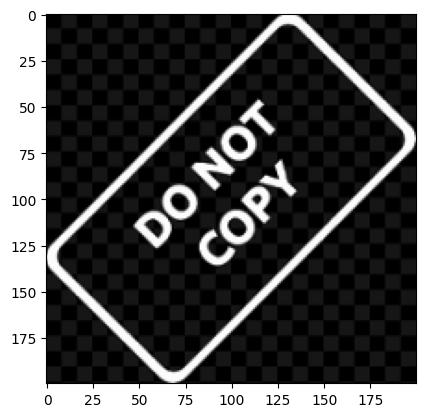

In [24]:
plt.imshow(mask_inv, cmap ='gray')

In [25]:
mask_inv.shape

(200, 200)

In [26]:
import numpy as np

In [27]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [29]:
bk =cv2.bitwise_or(white_background, white_background, mask=mask_inv)

In [30]:
bk.shape

(200, 200, 3)

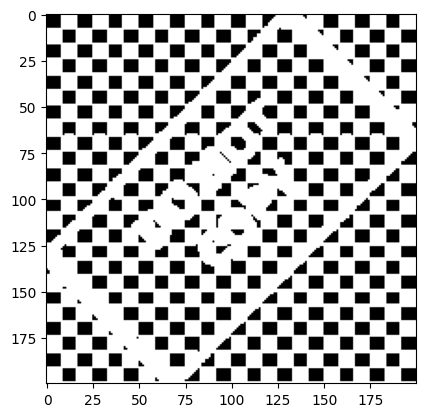

In [31]:
plt.imshow(bk)

In [32]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)

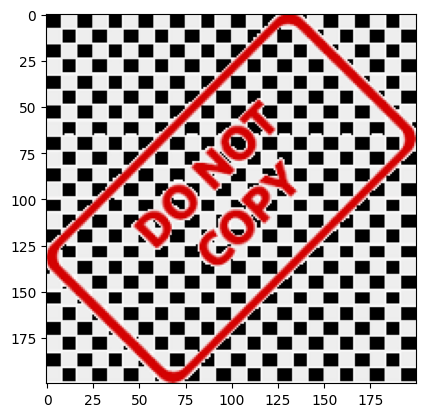

In [33]:
plt.imshow(fg)

In [34]:
final_roi = cv2.bitwise_or(roi,fg)

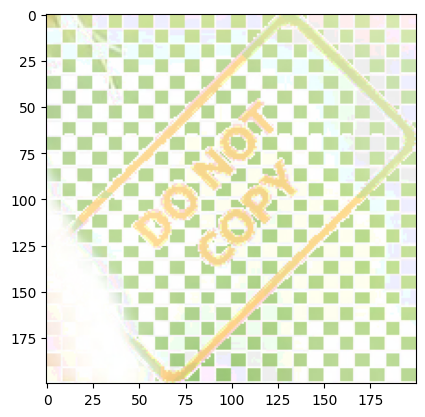

In [35]:
plt.imshow(final_roi)

In [36]:
large_img =img1
small_img =final_roi

In [37]:
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]]=small_img

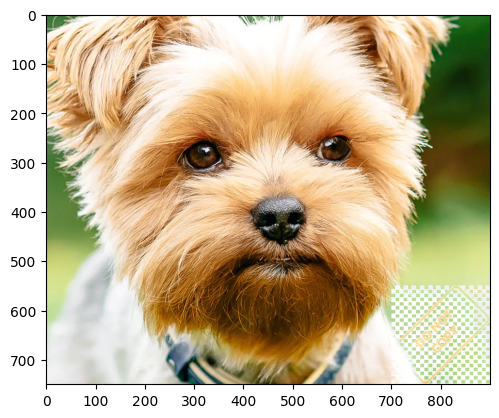

In [38]:
plt.imshow(large_img)